<a href="https://colab.research.google.com/github/shineeyang/Machine-Learning/blob/master/Shini_Yang_Unsupervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unlabeled Data and Unsupervised Machine Learning


## Example from Chp.11 Python Machine Learning

### Make blobs

In [0]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150,
                   n_features=2,
                   centers=3,
                   cluster_std=0.5,
                   shuffle=True,
                   random_state=0)



## Standardize data

In [0]:
X = 1.0*(X - X.mean())/X.std()

### Plot blobs

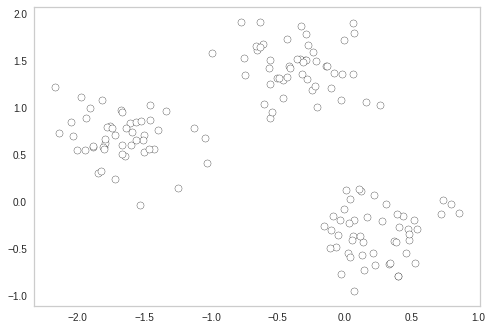

In [0]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],
             X[:,1],
             c='white',
             marker='o',
             edgecolor='black',
             s=50)
plt.grid()
plt.show()

### KMeans Cluster

In [0]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, 
             init='random', 
             n_init=10,
             max_iter=300, 
             tol=1e-04,
             random_state=0)
y_km = km.fit_predict(X)

### Plot Clusters and Centroids

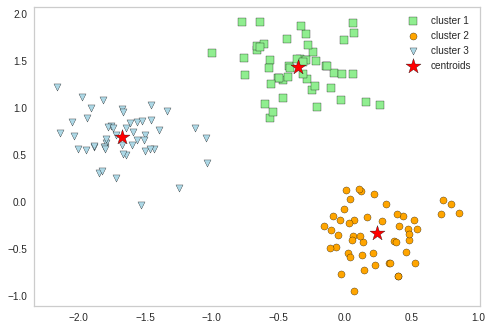

In [0]:
plt.scatter(X[y_km == 0, 0],
             X[y_km == 0, 1],
             s=50, c='lightgreen',
             marker='s', edgecolor='black',
             label='cluster 1')
plt.scatter(X[y_km == 1, 0],
             X[y_km == 1, 1],
             s=50, c='orange',
             marker='o', edgecolor='black',
             label='cluster 2')
plt.scatter(X[y_km == 2, 0],
             X[y_km == 2, 1],
             s=50, c='lightblue',
             marker='v', edgecolor='black',
             label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
             km.cluster_centers_[:, 1],
             s=250, marker='*',
             c='red', edgecolor='black',
             label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## ## Yellowbrick Elbow

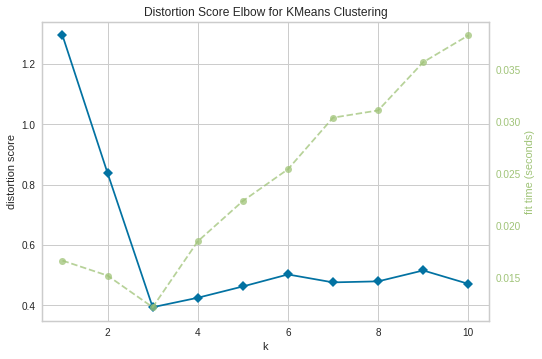

In [0]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(X)    
visualizer.poof()    

Using Elbow Method to visualize the cluster,  the cross point  of two lines at k=3 meaning it is a good cluster number, as the fit time is much lower than other cluster number. 

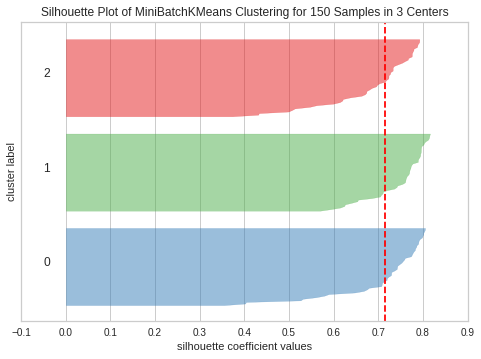

In [0]:
from sklearn.cluster import MiniBatchKMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = MiniBatchKMeans(3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X) 
visualizer.poof() 